Peyton Hansen

ITP 259 Fall 2023

HW 8: Image Classification Using CNN


Import Libararies

In [ ]:
import random
import numpy as np
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

Write code to train a CNN model which classifies the CIFAR100 dataset.

Load the dataset directly from keras - https://keras.io/api/datasets/cifar100/


There are coarse and fine labels.

Load only the fine labeled dataset.

Images are 32x32 pixels.

Three color channels.

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
print('1. The keras dataset has been loaded.')
labelDict = {1:'apple', 2:'aquarium_fish', 3:'baby', 4:'bear', 5:'beaver', 6:'bed', 7:'bee', 8:'beetle', 9:'bicycle', 10:'bottle', 11:'bowl', 12:'boy', 13:'bridge', 14:'bus', 15:'butterfly', 16:'camel', 17:'can', 18:'castle', 19:'caterpillar', 20:'cattle', 21:'chair', 22:'chimpanzee', 23:'clock', 24:'cloud', 25:'cockroach', 26:'couch', 27:'crab', 28:'crocodile', 29:'cup', 30:'dinosaur', 31:'dolphin', 32:'elephant', 33:'flatfish', 34:'forest', 35:'fox', 36:'girl', 37:'hamster', 38:'house', 39:'kangaroo', 40:'keyboard', 41:'lamp', 42:'lawn_mower', 43:'leopard', 44:'lion', 45:'lizard', 46:'lobster', 47:'man', 48:'maple_tree', 49:'motorcycle', 50:'mountain', 51:'mouse', 52:'mushroom', 53:'oak_tree', 54:'orange', 55:'orchid', 56:'otter', 57:'palm_tree', 58:'pear', 59:'pickup_truck', 60:'pine_tree', 61:'plain', 62:'plate', 63:'poppy', 64:'porcupine', 65:'possum', 66:'rabbit', 67:'raccoon', 68:'ray', 69:'road', 70:'rocket', 71:'rose', 72:'sea', 73:'seal', 74:'shark', 75:'shrew', 76:'skunk', 77:'skyscraper', 78:'snail', 79:'snake', 80:'spider', 81:'squirrel', 82:'streetcar', 83:'sunflower', 84:'sweet_pepper', 85:'table', 86:'tank', 87:'telephone', 88:'television', 89:'tiger', 90:'tractor', 91:'train', 92:'trout', 93:'tulip', 94:'turtle', 95:'wardrobe', 96:'whale', 97:'willow_tree', 98:'wolf', 99:'woman', 100:'worm'}

169001437/169001437 [==============================] - 4s 0us/step
1. The keras dataset has been loaded.


Partition the dataset into train and test sets. Print the shapes of the train and test data sets.

In [ ]:
print('2. The dataset has been partitioned into test and train sets.')
print("Train data shape:", x_train.shape)
print("Train labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

2. The dataset has been partitioned into test and train sets.
Train data shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


Visualize the first 30 images from the train dataset

3. The first 30 images from the train datset:


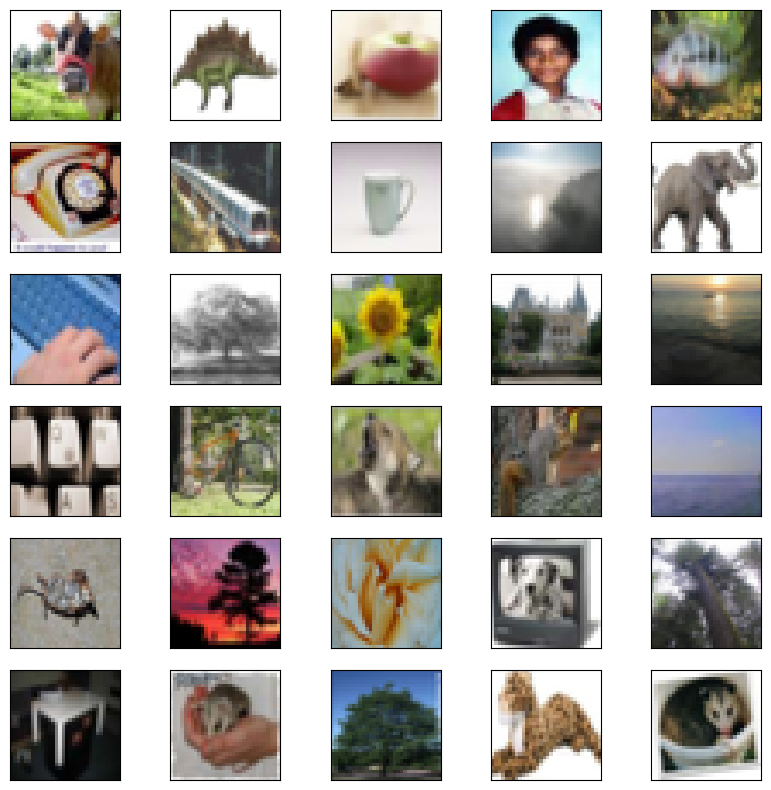

In [ ]:
print('3. The first 30 images from the train datset:')
plt.figure(figsize=(10, 10))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
plt.show()

Scale the pixel values

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0
print('4. The pixel values have been scaled.')

4. The pixel values have been scaled.


Build a CNN sequence of layers. Must contain the following layers. Hyper parameters are up to you.

At least 1 convolutional layer

At least 1 dropout layer

At least 1 maxpool layer

At least 1 flatten layer

At least 1 dense layer

In [ ]:
print('5. I built a model using 2 convolutional layers, 2 maxpool layers, 1 dropout layer, 1 flatten layer, 1 dense layer, and an output layer (also dense).')
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(32, (3, 3), padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')  # 100 classes
])

5. I built a model using 2 convolutional layers, 2 maxpool layers, 1 dropout layer, 1 flatten layer, 1 dense layer, and an output layer (also dense).


Use the loss function sparse_categorical_crossentropy when compiling the model

In [ ]:
print('6. I used the loss function sparse_categorical_crossentropy, the sgd optimier and accuracy as a metric.')
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

6. I used the loss function sparse_categorical_crossentropy, the sgd optimier and accuracy as a metric.


Train the model with at least 20 epochs

In [ ]:
print('7. I trained the model with 25 epochs.')
history = model.fit(x_train, y_train, epochs=25, validation_split=0.2)

7. I trained the model with 25 epochs.
Epoch 1/25
1250/1250 [==============================] - 7s 5ms/step - loss: 3.7748 - accuracy: 0.1280 - val_loss: 3.3825 - val_accuracy: 0.1979
Epoch 2/25
1250/1250 [==============================] - 6s 5ms/step - loss: 3.1043 - accuracy: 0.2433 - val_loss: 2.9503 - val_accuracy: 0.2780
Epoch 3/25
1250/1250 [==============================] - 5s 4ms/step - loss: 2.8353 - accuracy: 0.2951 - val_loss: 2.8029 - val_accuracy: 0.3070
Epoch 4/25
1250/1250 [==============================] - 6s 5ms/step - loss: 2.6699 - accuracy: 0.3279 - val_loss: 2.8331 - val_accuracy: 0.3021
Epoch 5/25
1250/1250 [==============================] - 6s 5ms/step - loss: 2.5619 - accuracy: 0.3484 - val_loss: 2.7005 - val_accuracy: 0.3346
Epoch 6/25
1250/1250 [==============================] - 6s 5ms/step - loss: 2.4668 - accuracy: 0.3677 - val_loss: 2.7246 - val_accuracy: 0.3362
Epoch 7/25
1250/1250 [==============================] - 7s 5ms/step - loss: 2.4026 - accuracy: 0.

Plot the loss and accuracy curves for both train and validation sets.

8. Here are the accuracy and loss plots comparing the training and testing sets.


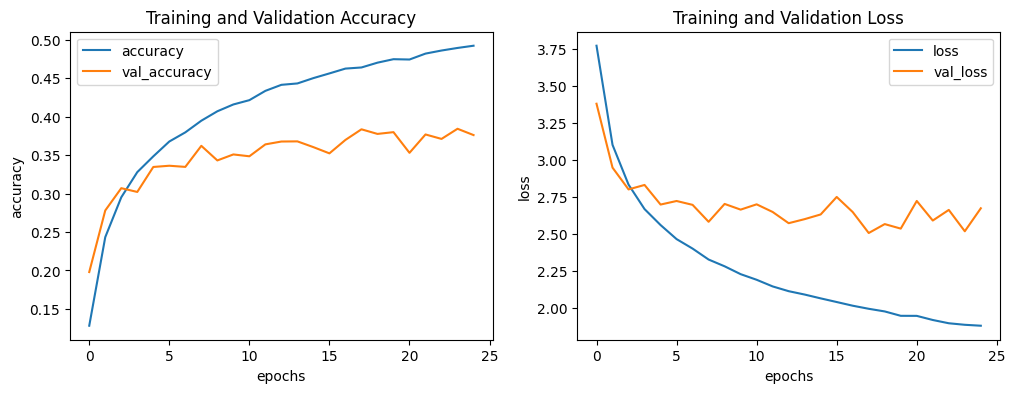

In [ ]:
print('8. Here are the accuracy and loss plots comparing the training and testing sets.')
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Visualize the predicted and actual image labels for the first 30 images in the dataset.

9. Here are the predicted and actual image lables for the first 30 images in the dataset.
1/1 [==============================] - 0s 140ms/step


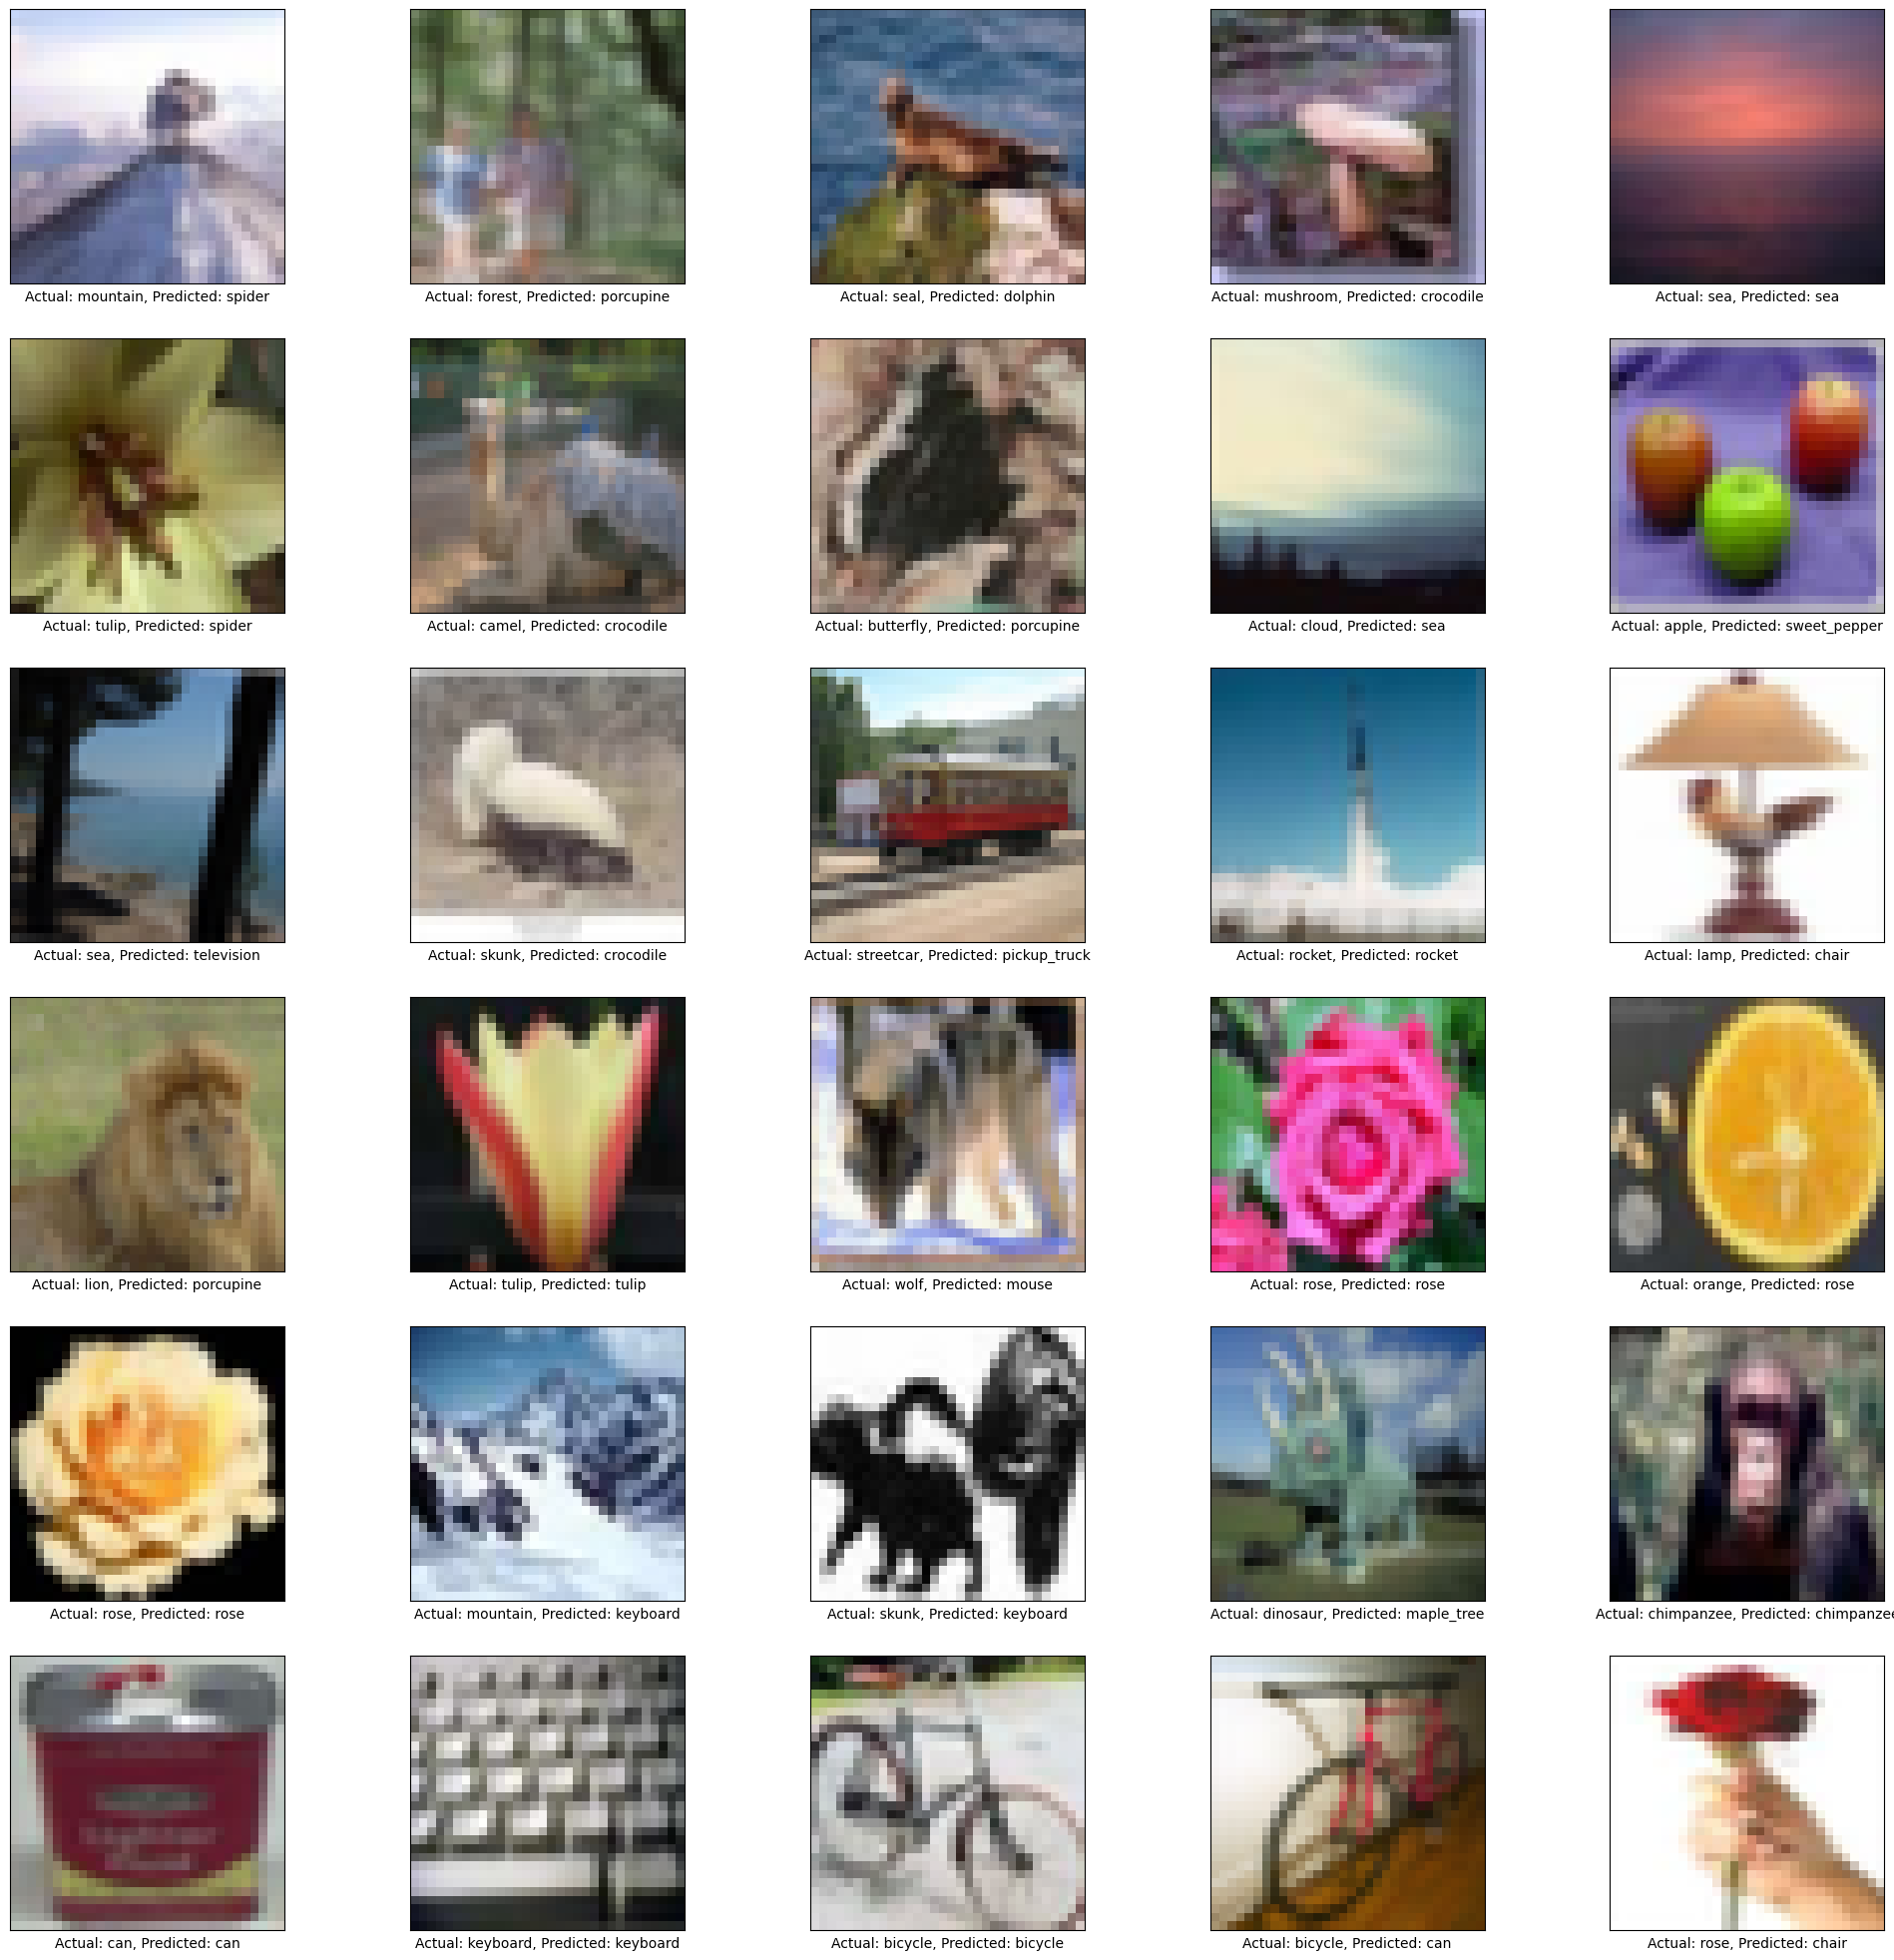

In [ ]:
print('9. Here are the predicted and actual image lables for the first 30 images in the dataset.')
predictions = model.predict(x_test[:30])
plt.figure(figsize=(25, 25))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    int1 = np.argmax(predictions[i])
    #need to add 1 because dictionary is 1 value off
    int1 = int1.item() + 1
    predLabel = labelDict[int1]
    int2 = y_test[i][0]
    int2 = int2.item() + 1
    actualLabel = labelDict[int2]
    plt.xlabel(f"Actual: {actualLabel}, Predicted: {predLabel}")
plt.show()

Visualize 30 random misclassified images

10. Here are the predicted and actual image labels for 30 missclassified images in the dataset.
313/313 [==============================] - 1s 2ms/step


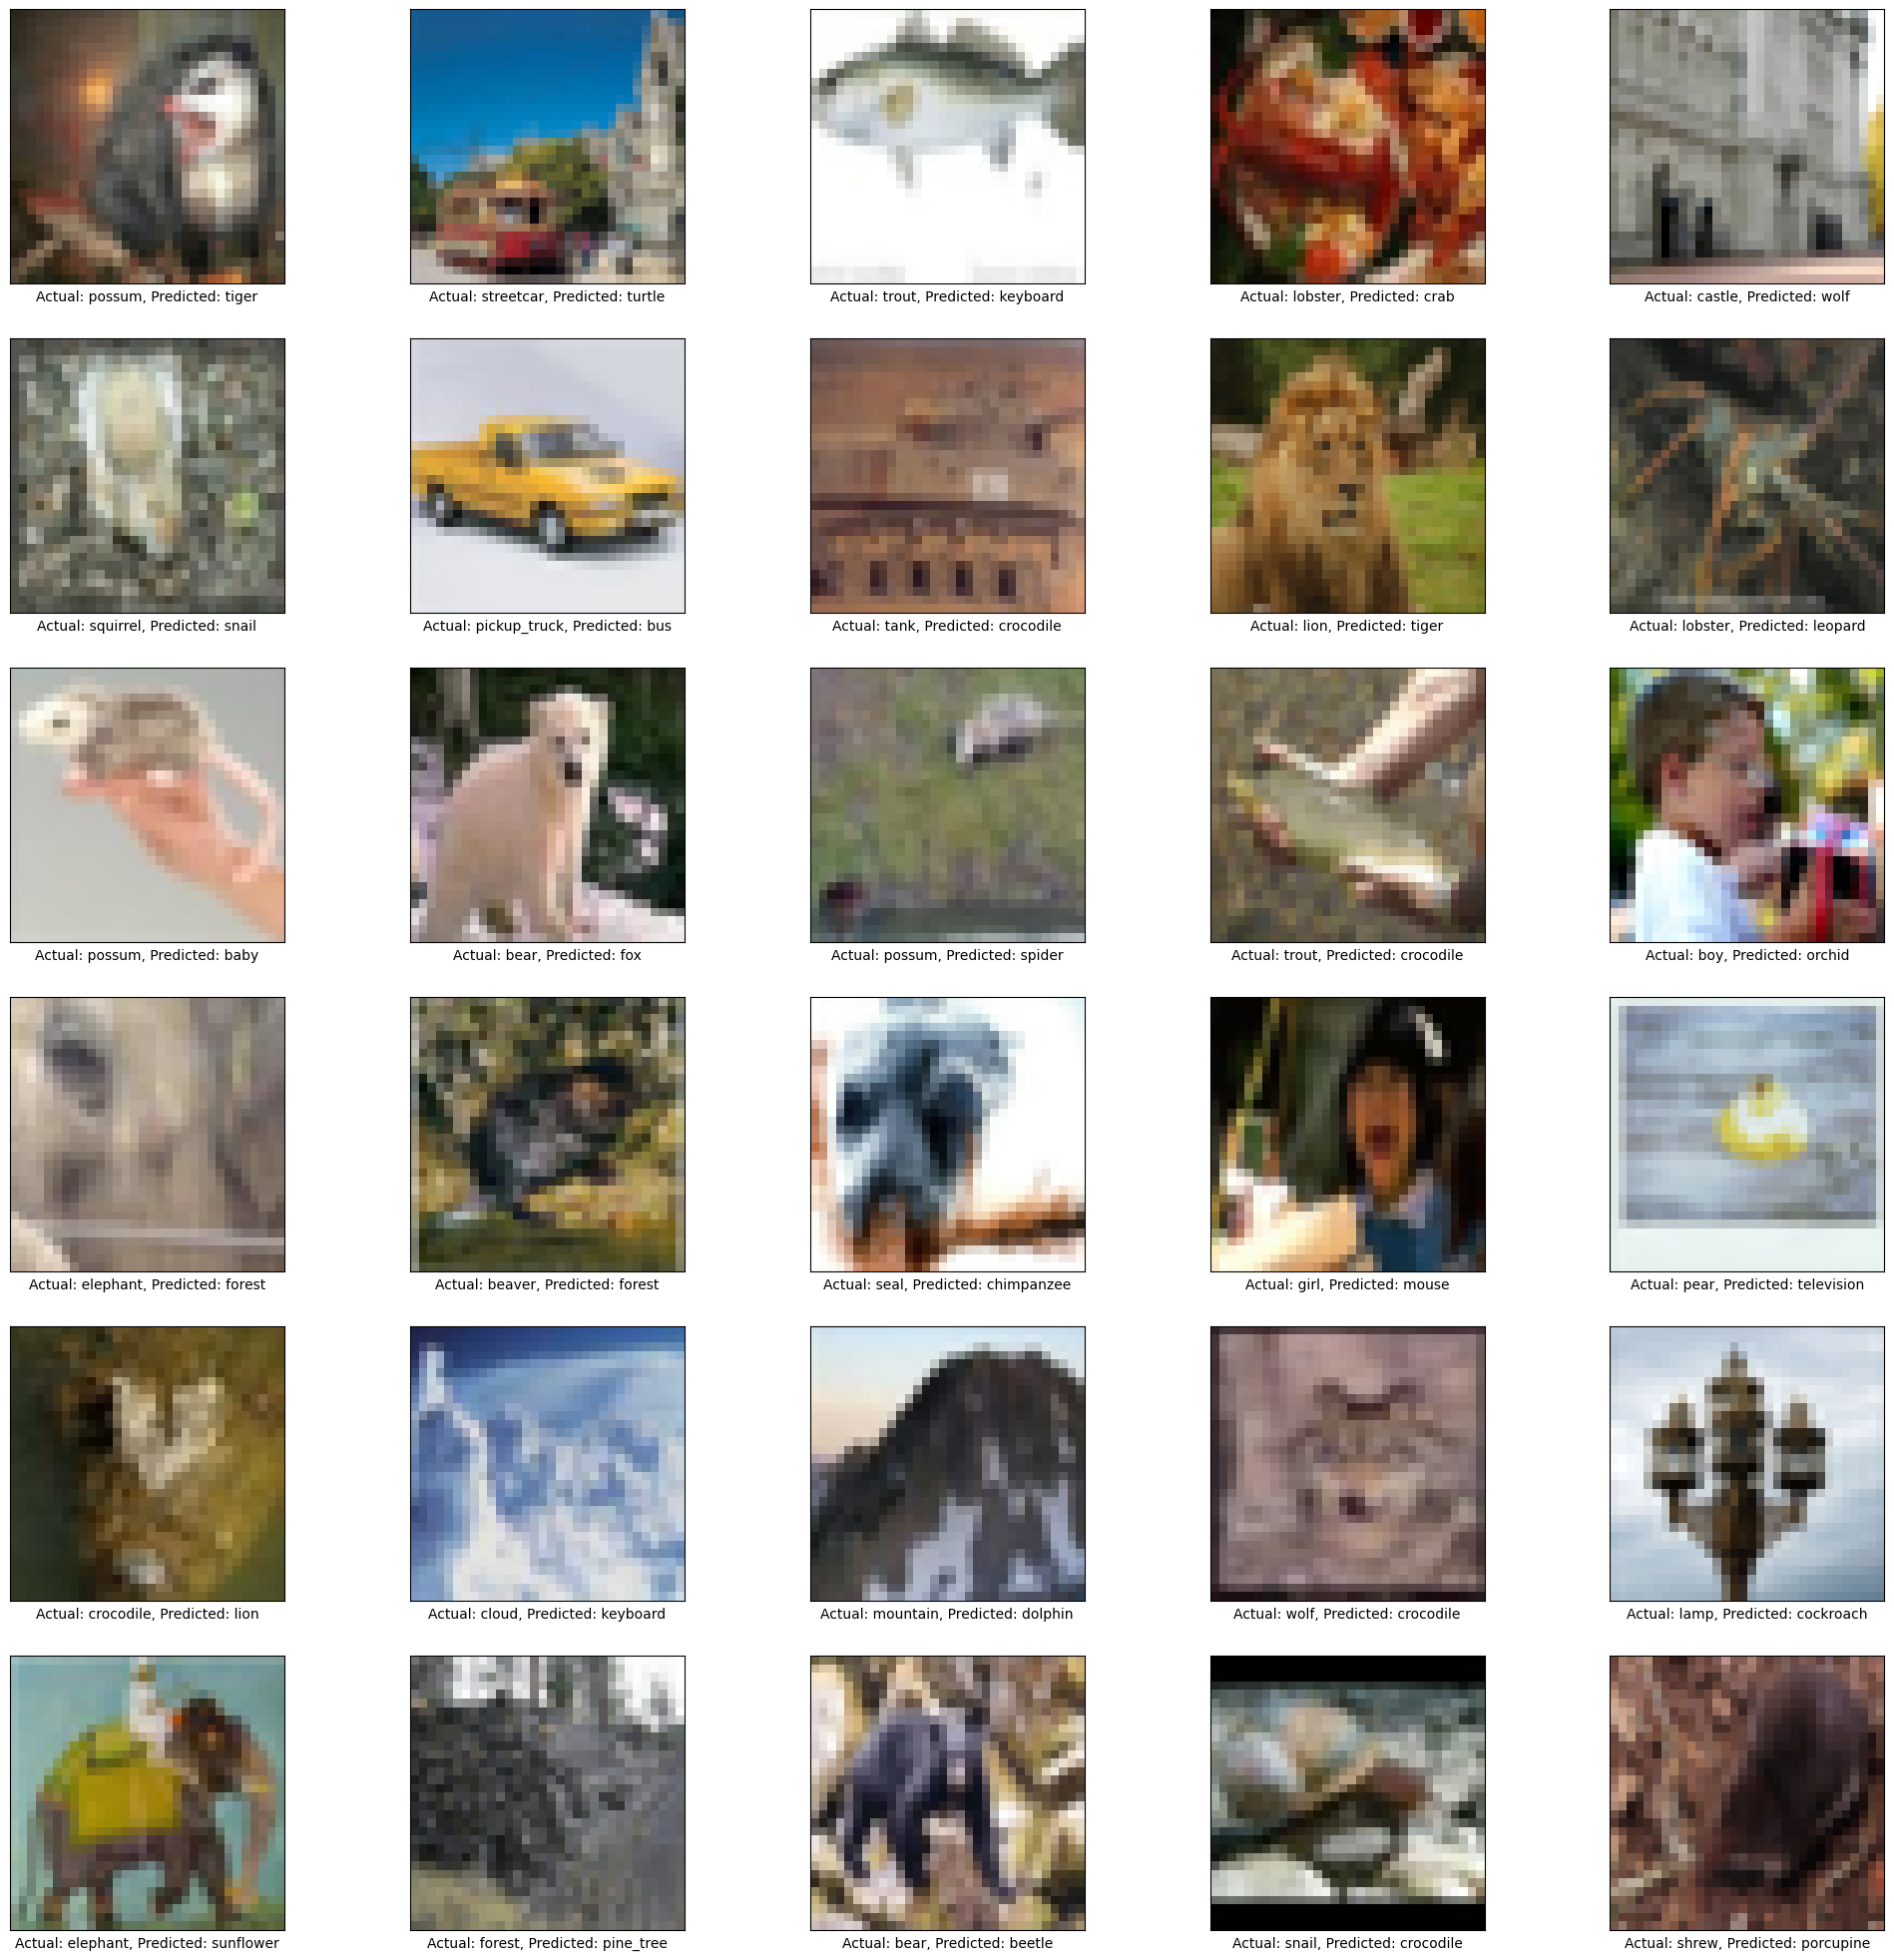

In [ ]:
print('10. Here are the predicted and actual image labels for 30 missclassified images in the dataset.')
predictions = model.predict(x_test)
plt.figure(figsize=(25, 25))
misclassified_indexes = []
for i in range(len(y_test)):
    if np.argmax(predictions[i]) != y_test[i]:
        misclassified_indexes.append(i)
random_indexes = np.random.choice(misclassified_indexes, 30)
i = 0
for index in random_indexes:
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[index])
    int1 = y_test[index][0]
    int1 = int1.item() + 1
    actualLabel = labelDict[int1]
    int2 = np.argmax(predictions[index])
    int2 = int2.item() + 1
    predLabel = labelDict[int2]
    plt.xlabel(f"Actual: {actualLabel}, Predicted: {predLabel}")
    i+=1
plt.show()